<a href="https://colab.research.google.com/github/yasmine-oukemoum/-Forest-Cover-Type-Classification/blob/main/stage03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

✅ Dataset loaded successfully!
Shape: (581012, 55)

Cover type distribution:
 cover_type
2    283301
1    211840
3     35754
7     20510
6     17367
5      9493
4      2747
Name: count, dtype: int64

Sample of the dataset:
   Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
0     2596.0    51.0    3.0                             258.0   
1     2590.0    56.0    2.0                             212.0   
2     2804.0   139.0    9.0                             268.0   
3     2785.0   155.0   18.0                             242.0   
4     2595.0    45.0    2.0                             153.0   

   Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
0                             0.0                            510.0   
1                            -6.0                            390.0   
2                            65.0                           3180.0   
3                           118.0                           3090.0   
4                            -1.0   

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [18:47:30] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


⚡ XGBoost baseline accuracy: 0.8696

🔍 Hyperparameter tuning in progress...
Fitting 3 folds for each of 4 candidates, totalling 12 fits


/usr/local/lib/python3.12/dist-packages/joblib/externals/loky/process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(



Best RandomForest parameters: {'max_depth': None, 'n_estimators': 200}
Fitting 3 folds for each of 8 candidates, totalling 24 fits


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [19:42:18] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



Best XGBoost parameters: {'learning_rate': 0.1, 'max_depth': 8, 'n_estimators': 200}

✅ Tuned RandomForest accuracy: 0.9542
✅ Tuned XGBoost accuracy: 0.8898

Classification Report (XGBoost):
              precision    recall  f1-score   support

           0       0.89      0.86      0.87     42368
           1       0.88      0.92      0.90     56661
           2       0.91      0.93      0.92      7151
           3       0.89      0.87      0.88       549
           4       0.91      0.62      0.74      1899
           5       0.87      0.83      0.85      3473
           6       0.96      0.94      0.95      4102

    accuracy                           0.89    116203
   macro avg       0.90      0.85      0.87    116203
weighted avg       0.89      0.89      0.89    116203



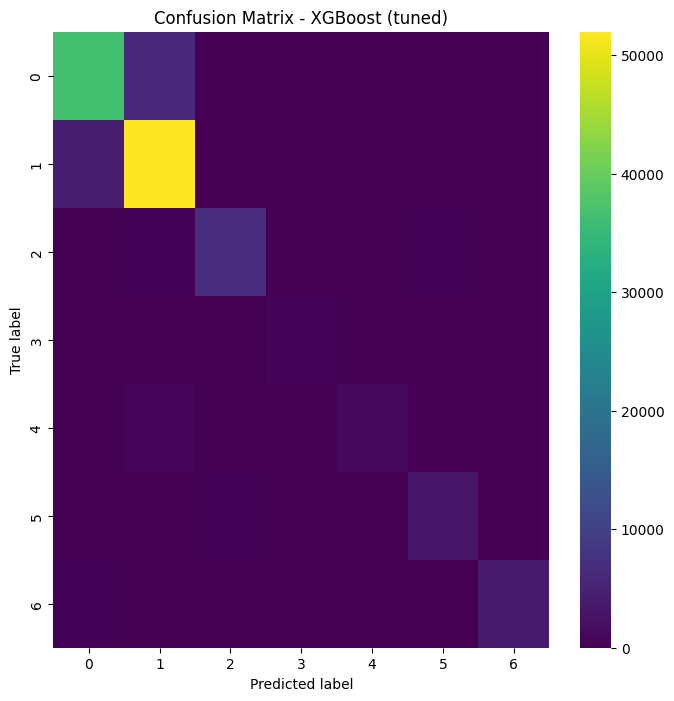


Top 10 Random Forest feature importances:
 Elevation                             0.242611
Horizontal_Distance_To_Roadways       0.117766
Horizontal_Distance_To_Fire_Points    0.111453
Horizontal_Distance_To_Hydrology      0.060382
Vertical_Distance_To_Hydrology        0.057561
Aspect                                0.047783
Hillshade_Noon                        0.043101
Hillshade_3pm                         0.041004
Hillshade_9am                         0.040960
Slope                                 0.032795
dtype: float64


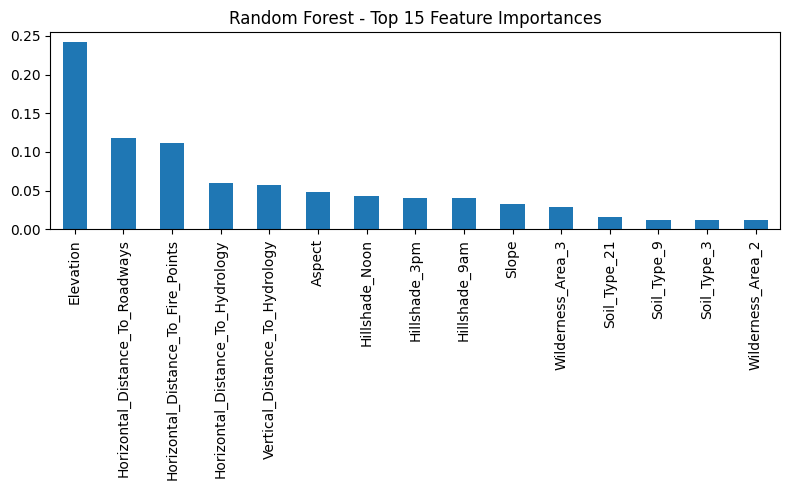


Top 10 XGBoost feature importances:
 Elevation            0.082659
Soil_Type_21         0.055219
Wilderness_Area_0    0.054171
Soil_Type_1          0.050226
Soil_Type_31         0.044014
Soil_Type_11         0.042557
Soil_Type_3          0.042168
Soil_Type_38         0.037962
Wilderness_Area_2    0.033500
Soil_Type_28         0.028307
dtype: float32


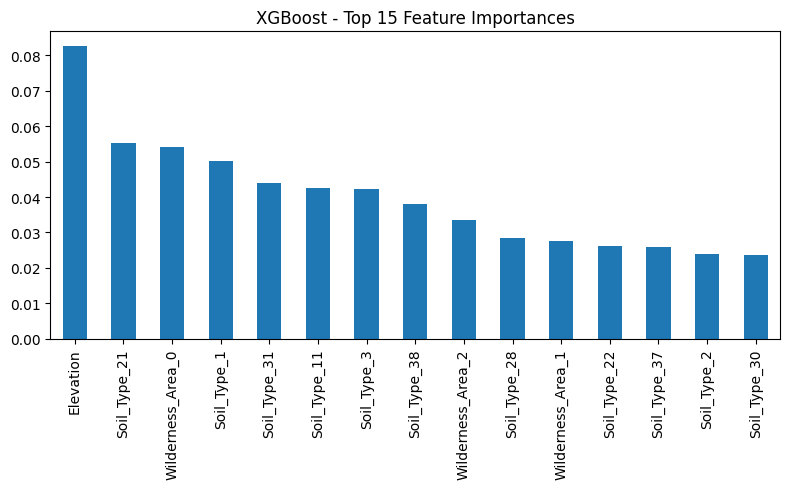


💾 Best model saved as 'best_cover_type_model.joblib'

🎉 Project completed successfully!


In [ ]:

# === 1. IMPORT LIBRARIES ===
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import fetch_covtype
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

from xgboost import XGBClassifier
import joblib

# === 2. LOAD THE DATASET ===
# Fetch the Covertype dataset (features and labels)
X_raw, y_raw = fetch_covtype(return_X_y=True, as_frame=False)

# Get feature names from the dataset
feature_names = fetch_covtype().feature_names

# Create a pandas DataFrame
df = pd.DataFrame(X_raw, columns=feature_names)
df['cover_type'] = y_raw

# Display basic info
print("✅ Dataset loaded successfully!")
print("Shape:", df.shape)
print("\nCover type distribution:\n", df['cover_type'].value_counts())

# === 3. EXPLORATORY DATA ANALYSIS (EDA) ===
print("\nSample of the dataset:")
print(df.head())

# Summary statistics for numeric features
numeric_cols = [col for col in df.columns if df[col].dtype != 'uint8' and col != 'cover_type']
print("\nNumeric summary:")
print(df[numeric_cols].describe().T)

# Check for missing values
print("\nMissing values in each column:")
print(df.isnull().sum().sum())

# === 4. PREPROCESSING ===
# This dataset is already clean and encoded, so minimal preprocessing is needed.
# Just separate features (X) and target (y)

X = df.drop(columns=['cover_type'])

y = df['cover_type']
# Adjust target labels for XGBoost (0-based indexing)
y = y - 1
print("\n✅ Features and target separated successfully!")

# === 5. TRAIN/TEST SPLIT ===
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("\nTraining set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

# === 6. BASELINE MODELS ===

## Random Forest baseline
rf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
rf_acc = accuracy_score(y_test, rf_pred)
print(f"\n🌲 Random Forest baseline accuracy: {rf_acc:.4f}")

## XGBoost baseline
xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42, n_jobs=-1)
xgb.fit(X_train, y_train)
xgb_pred = xgb.predict(X_test)
xgb_acc = accuracy_score(y_test, xgb_pred)
print(f"⚡ XGBoost baseline accuracy: {xgb_acc:.4f}")

# === 7. HYPERPARAMETER TUNING ===
print("\n🔍 Hyperparameter tuning in progress...")

## Random Forest tuning
rf_param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 20]
}
rf_grid = GridSearchCV(
    RandomForestClassifier(random_state=42, n_jobs=-1),
    rf_param_grid, cv=3, scoring='accuracy', n_jobs=-1, verbose=1
)
rf_grid.fit(X_train, y_train)
rf_best = rf_grid.best_estimator_
print("\nBest RandomForest parameters:", rf_grid.best_params_)

## XGBoost tuning
xgb_param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [4, 8],
    'learning_rate': [0.1, 0.05]
}
xgb_grid = GridSearchCV(
    XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42, n_jobs=-1),
    xgb_param_grid, cv=3, scoring='accuracy', n_jobs=-1, verbose=1
)
xgb_grid.fit(X_train, y_train)
xgb_best = xgb_grid.best_estimator_
print("\nBest XGBoost parameters:", xgb_grid.best_params_)

# === 8. EVALUATION ===
## Evaluate tuned Random Forest
rf_best_pred = rf_best.predict(X_test)
rf_best_acc = accuracy_score(y_test, rf_best_pred)
print(f"\n✅ Tuned RandomForest accuracy: {rf_best_acc:.4f}")

## Evaluate tuned XGBoost
xgb_best_pred = xgb_best.predict(X_test)
xgb_best_acc = accuracy_score(y_test, xgb_best_pred)
print(f"✅ Tuned XGBoost accuracy: {xgb_best_acc:.4f}")

# Classification report for XGBoost
print("\nClassification Report (XGBoost):")
print(classification_report(y_test, xgb_best_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, xgb_best_pred)
plt.figure(figsize=(8, 8))
sns.heatmap(cm, annot=False, cmap='viridis')
plt.title("Confusion Matrix - XGBoost (tuned)")
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.show()

# === 9. FEATURE IMPORTANCE ===
## Random Forest
rf_importances = pd.Series(rf_best.feature_importances_, index=X.columns).sort_values(ascending=False)
print("\nTop 10 Random Forest feature importances:\n", rf_importances.head(10))

plt.figure(figsize=(8, 5))
rf_importances.head(15).plot(kind='bar')
plt.title("Random Forest - Top 15 Feature Importances")
plt.tight_layout()
plt.show()

## XGBoost
xgb_importances = pd.Series(xgb_best.feature_importances_, index=X.columns).sort_values(ascending=False)
print("\nTop 10 XGBoost feature importances:\n", xgb_importances.head(10))

plt.figure(figsize=(8, 5))
xgb_importances.head(15).plot(kind='bar')
plt.title("XGBoost - Top 15 Feature Importances")
plt.tight_layout()
plt.show()

# === 10. SAVE THE BEST MODEL ===
best_model = xgb_best if xgb_best_acc >= rf_best_acc else rf_best
joblib.dump(best_model, "best_cover_type_model.joblib")

print("\n💾 Best model saved as 'best_cover_type_model.joblib'")
print("\n🎉 Project completed successfully!")
